In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dados/votos/votacoesVotos-2018.csv", sep=";")
print(df.columns)
df = df.drop(["uriVotacao", "deputado_uri", "deputado_uriPartido", "deputado_urlFoto", "deputado_idLegislatura"], axis=1)
df["voto"].replace({"Sim": 1, "Não": -1, "Abstenção": 0, 'Artigo 17':0, 'Obstrução':0}, inplace=True)
df["voto_count"] = 1
df

Index(['idVotacao', 'uriVotacao', 'dataHoraVoto', 'voto', 'deputado_id',
       'deputado_uri', 'deputado_nome', 'deputado_siglaPartido',
       'deputado_uriPartido', 'deputado_siglaUf', 'deputado_idLegislatura',
       'deputado_urlFoto'],
      dtype='object')


,idVotacao,dataHoraVoto,voto,deputado_id,deputado_nome,deputado_siglaPartido,deputado_siglaUf,voto_count
0,109150-238,2018-03-13T21:15:26,-1.0,178957,Abel Mesquita Jr.,DEM,RR,1
1,109150-238,2018-03-13T21:14:04,-1.0,178864,Adail Carneiro,PP,CE,1
2,109150-238,2018-03-13T21:12:18,-1.0,178914,Adalberto Cavalcanti,AVANTE,PE,1
3,109150-238,2018-03-13T21:11:01,0.0,178890,Adelmo Carneiro Leão,PT,MG,1
4,109150-238,2018-03-13T21:14:06,-1.0,178968,Adelson Barreto,PR,SE,1
...,...,...,...,...,...,...,...,...
45936,622360-120,2018-12-11T15:25:07,1.0,73992,Yeda Crusius,PSDB,RS,1
45937,622360-120,2018-12-11T15:11:04,1.0,160632,Zé Silva,SD,MG,1
45938,622360-120,2018-12-11T15:35:08,1.0,178923,Zeca Cavalcanti,PTB,PE,1
45939,622360-120,2018-12-11T15:04:40,1.0,178902,Zeca do Pt,PT,MS,1


In [3]:
df.columns = ['idVotacao', 'data', 'voto', 'id', 'nome',
       'partido', 'UF', 'voto_count']

In [4]:
new_df = df.groupby(["partido"]).sum()
new_df = new_df.drop(["id", "voto_count"], axis=1)
new_df = new_df.reset_index(level=0)
new_df = new_df.sort_values("voto")
new_df

,partido,voto
20,PSDB,-728.0
10,PP,-477.0
8,PMDB,-466.0
1,DEM,-426.0
13,PR,-336.0
19,PSD,-314.0
14,PRB,-168.0
24,PTB,-117.0
9,PODE,-112.0
21,PSL,-102.0


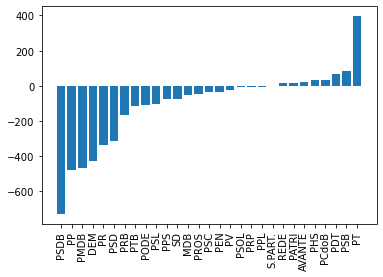

In [5]:
plt.xticks(rotation=90)
plt.bar(new_df["partido"], new_df["voto"])
plt.show()